# <font color='CadetBlue'> **ПРАКТИКУМ ПО ПРОГРАММИРОВАНИЮ (1 курс)**

## <font color='CadetBlue'> **ВТОРОЙ СЕМЕСТР**

### <font color='CadetBlue'> **II** —  апрель, май

In [56]:
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from itertools import count, islice, chain
from functools import reduce
import math

#### <font color='LightCoral'> **ЗАДАНИЕ 2.** Реализация пакета модулей для манипулирования плоскими фигурами.

Реализовать API, которое позволяет генерировать, преобразовывать и визуализировать последовательность плоских полигонов, представленных в виде картежа картежей (например: `((0,0), (0,1), (1,1), (1,0))` — представление для квадрата). Последовательности представлений полигонов представляют собой итераторы (далее: последовательности полигонов). Решать задачи с использованием функционального стиля программирования, в том числе активно использовать функции из модуля `itertools` и `functools`.

Суммарная сложность дополнительных заданий должна быть не менее 5.

1.	Реализовать функцию визуализации последовательности полигонов, представленной в виде итератора (например, можно использовать визуализацию с помощью библиотеки `matplotlib`, см. пример: [ссылка](https://matplotlib.org/stable/gallery/shapes_and_collections/patch_collection.html#sphx-glr-gallery-shapes-and-collections-patch-collection-py)).

<font color="Crimson">**обязательная часть**

In [57]:
def gen_rectangle(start_x=0, step=1):
    """Генерирует координаты вершин прямоугольников в двумерном пространстве.

    Args:
        start_x (float, optional): Начальная координата x для первого прямоугольника. По умолчанию 0.
        step (float, optional): Шаг смещения по оси x для каждого следующего прямоугольника. По умолчанию 1.

    Yields:
        tuple: Кортеж из четырех кортежей, представляющих координаты вершин прямоугольника
               в формате ((x1, y1), (x2, y2), (x3, y3), (x4, y4)).
    """
    for x in count(start=start_x, step=step):
        yield ((x, 0), (x+1, 0), (x+1, 1), (x, 1))

def gen_triangle(start_x=0, step=1):
    """Генерирует координаты вершин треугольников в двумерном пространстве.

    Args:
        start_x (float, optional): Начальная координата x для первого треугольника. По умолчанию 0.
        step (float, optional): Шаг смещения по оси x для каждого следующего треугольника. По умолчанию 1.

    Yields:
        tuple: Кортеж из трех кортежей, представляющих координаты вершин треугольника в формате ((x1, y1), (x2, y2), (x3, y3)).
    """
    for x in count(start=start_x, step=step):
        yield ((x, 0), (x+0.5, 1), (x+1, 0))

def gen_hexagon(start_x=0, step=1.5):
    """Генерирует координаты вершин шестиугольников в двумерном пространстве.

    Args:
        start_x (float, optional): Начальная координата x для первого шестиугольника. По умолчанию 0.
        step (float, optional): Шаг смещения по оси x для каждого следующего шестиугольника. По умолчанию 1.5.

    Yields:
        tuple: Кортеж из шести кортежей, представляющих координаты вершин шестиугольника
               в формате ((x1, y1), (x2, y2), ..., (x6, y6)).
    """
    for x in count(start=start_x, step=step):
        yield tuple((x + math.cos(math.pi/3 * i), math.sin(math.pi/3 * i))for i in range(6)        )

# === Визуализация ===

def visualize(polygons, title=""):
    """Визуализирует набор полигонов на двумерном графике.

    Args:
        polygons (iterable): Итерируемый объект, содержащий координаты вершин полигонов. Каждый полигон представлен списком или кортежем координат вершин.
        title (str, optional): Заголовок графика. По умолчанию пустая строка.

    Note:
        Использует библиотеку matplotlib для построения графика.
        Полигоны отображаются без заливки, с черными границами.
        Оси масштабируются автоматически для равного отображения.
    """
    fig, ax = plt.subplots()
    for poly in polygons:
        patch = Polygon(poly, closed=True, fill=False, edgecolor='black')
        ax.add_patch(patch)
    ax.set_aspect('equal')
    ax.autoscale()
    plt.title(title)
    plt.grid(False)
    plt.show()

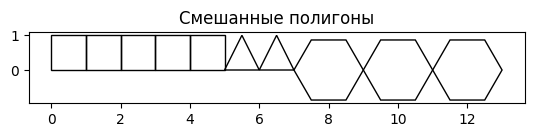

In [58]:
rectangles = islice(gen_rectangle(), 5)
triangles = islice(gen_triangle(start_x=5), 2)
hexagons = islice(gen_hexagon(start_x=8, step=2), 3)

all_polygons = chain(rectangles, triangles, hexagons)
visualize(all_polygons, title="Смешанные полигоны")

2.	Реализовать функции, генерирующие бесконечную последовательность непересекающихся полигонов с различающимися координатами (например, «ленту», см. рис. 2):

* прямоугольников (`gen_rectangle`);

* треугольников (`gen_triangle`);

* правильных шестиугольников (`gen_hexagon`).

* с помощью данных функций используя функции из модуля `itertools` сгенерировать семь фигур, включающих как прямоугольники, так и треугольники и шестиугольники, визуализировать результат.

<font color="Crimson">**обязательная часть**


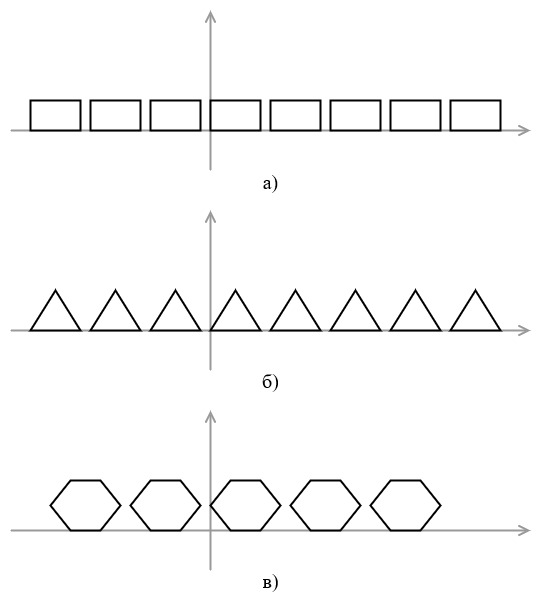

Рисунок 2 — Последовательности непересекающихся полигонов

In [59]:
def gen_rectangle(start_x=0, step=1, height=1, width=1):
    """Генерирует координаты вершин прямоугольников, расположенных горизонтально.

    Args:
        start_x (float, optional): Начальная координата x для первого прямоугольника. По умолчанию 0.
        step (float, optional): Шаг смещения по оси x для каждого следующего прямоугольника. По умолчанию 1.1.
        height (float, optional): Высота прямоугольника. По умолчанию 1.0.
        width (float, optional): Ширина прямоугольника. По умолчанию 1.0.

    Yields:
        tuple: Кортеж из четырех кортежей, представляющих координаты вершин прямоугольника
               в формате ((x1, y1), (x2, y2), (x3, y3), (x4, y4)).
    """
    for x in count(start_x, step):
        yield ((x, 0), (x + width, 0), (x + width, height), (x, height))

def gen_triangle(start_x=0, step=1, height=1):
    """Генерирует координаты вершин треугольников, расположенных горизонтально.

    Args:
        start_x (float, optional): Начальная координата x для первого треугольника. По умолчанию 0.
        step (float, optional): Шаг смещения по оси x для каждого следующего треугольника. По умолчанию 1.1.
        height (float, optional): Высота треугольника. По умолчанию 1.0.

    Yields:
        tuple: Кортеж из трех кортежей, представляющих координаты вершин треугольника
               в формате ((x1, y1), (x2, y2), (x3, y3)).
    """
    for x in count(start_x, step):
        yield ((x, 0), (x + 0.5 * step, height), (x + step, 0))

def gen_hexagon(start_x=0, step=2, radius=1):
    """Генерирует координаты вершин шестиугольников, расположенных горизонтально с шагом, чтобы не пересекались.

    Args:
        start_x (float, optional): Начальная координата x для первого шестиугольника. По умолчанию 0.
        step (float, optional): Шаг смещения по оси x для каждого следующего шестиугольника. По умолчанию 1.6.
        radius (float, optional): Радиус описанной окружности шестиугольника. По умолчанию 0.8.

    Yields:
        tuple: Кортеж из шести кортежей, представляющих координаты вершин шестиугольника
               в формате ((x1, y1), (x2, y2), ..., (x6, y6)).
    """
    for x in count(start_x, step):
        yield tuple((x + radius * math.cos(math.pi/3 * i), radius * math.sin(math.pi/3 * i)) for i in range(6))

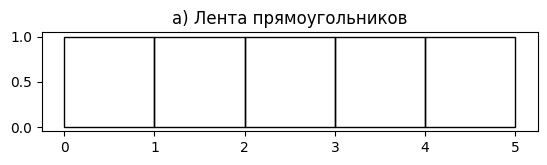

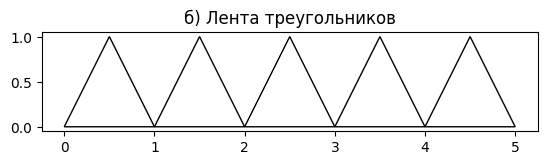

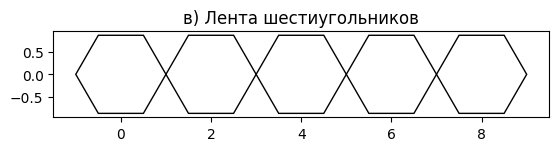

In [60]:
visualize(islice(gen_rectangle(), 5), title="а) Лента прямоугольников")

visualize(islice(gen_triangle(), 5), title="б) Лента треугольников")

visualize(islice(gen_hexagon(), 5), title="в) Лента шестиугольников")

3.	Реализовать операции:

* параллельный перенос (`tr_translate`);

* поворот (`tr_rotate`);

* симметрия (`tr_symmetry`);

* гомотетия (`tr_homothety`);

которые можно применить к последовательности полигонов с помощью функции `map`.

<font color="Crimson">**обязательная часть**


In [61]:
def tr_translate(polygon, dx=0, dy=0):
    """Выполняет параллельный перенос полигона на заданное расстояние по осям x и y.

    Args:
        polygon (iterable): Итерируемый объект, содержащий координаты вершин полигона.
                           Каждая вершина представлена кортежем (x, y).
        dx (float, optional): Смещение по оси x. По умолчанию 0.
        dy (float, optional): Смещение по оси y. По умолчанию 0.

    Returns:
        tuple: Кортеж кортежей, представляющих новые координаты вершин полигона
               после параллельного переноса в формате ((x1, y1), (x2, y2), ...).
    """
    return tuple((x + dx, y + dy) for x, y in polygon)

def tr_rotate(polygon, angle_deg, center=(0, 0)):
    """Поворачивает полигон на заданный угол вокруг указанного центра.

    Args:
        polygon (iterable): Итерируемый объект, содержащий координаты вершин полигона.
                           Каждая вершина представлена кортежем (x, y).
        angle_deg (float): Угол поворота в градусах.
        center (tuple, optional): Координаты центра поворота в формате (cx, cy).
                                 По умолчанию (0, 0).

    Returns:
        tuple: Кортеж кортежей, представляющих новые координаты вершин полигона
               после поворота в формате ((x1, y1), (x2, y2), ...).
    """
    angle = math.radians(angle_deg)
    cx, cy = center
    return tuple((
        cx + (x - cx) * math.cos(angle) - (y - cy) * math.sin(angle),
        cy + (x - cx) * math.sin(angle) + (y - cy) * math.cos(angle)
    ) for x, y in polygon)

def tr_symmetry(polygon, axis='x'):
    """Отражает полигон относительно указанной оси (x или y).

    Args:
        polygon (iterable): Итерируемый объект, содержащий координаты вершин полигона.
                           Каждая вершина представлена кортежем (x, y).
        axis (str, optional): Ось отражения, принимает значения 'x' или 'y'.
                             По умолчанию 'x'.

    Returns:
        tuple: Кортеж кортежей, представляющих новые координаты вершин полигона
               после отражения в формате ((x1, y1), (x2, y2), ...).

    Raises:
        ValueError: Если параметр axis не равен 'x' или 'y'.
    """
    if axis == 'x':
        return tuple((x, -y) for x, y in polygon)
    elif axis == 'y':
        return tuple((-x, y) for x, y in polygon)
    else:
        raise ValueError("axis должен быть 'x' or 'y'")

def tr_homothety(polygon, scale, center=(0, 0)):
    """Выполняет гомотетию (масштабирование) полигона относительно заданного центра.

    Args:
        polygon (iterable): Итерируемый объект, содержащий координаты вершин полигона.
                           Каждая вершина представлена кортежем (x, y).
        scale (float): Коэффициент масштабирования.
        center (tuple, optional): Координаты центра масштабирования в формате (cx, cy).
                                 По умолчанию (0, 0).

    Returns:
        tuple: Кортеж кортежей, представляющих новые координаты вершин полигона
               после масштабирования в формате ((x1, y1), (x2, y2), ...).
    """
    cx, cy = center
    return tuple(((x - cx) * scale + cx, (y - cy) * scale + cy) for x, y in polygon)

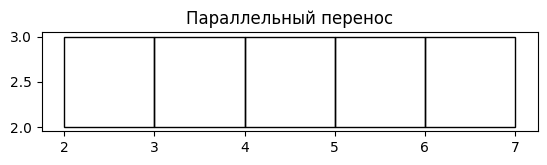

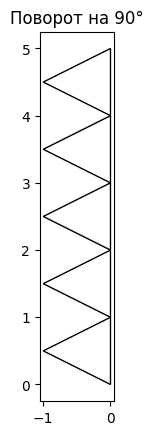

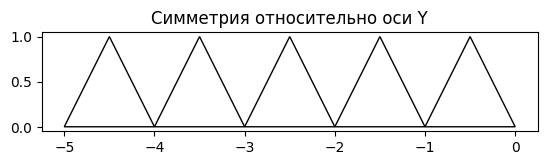

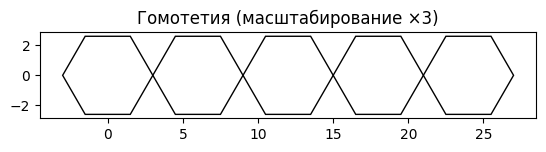

In [62]:
translated = map(lambda p: tr_translate(p, dx=2, dy=2), islice(gen_rectangle(), 5))
visualize(translated, title="Параллельный перенос")

rotated = map(lambda p: tr_rotate(p, angle_deg=90), islice(gen_triangle(), 5))
visualize(rotated, title="Поворот на 90°")

symmetric = map(lambda p: tr_symmetry(p, axis='y'), islice(gen_triangle(), 5))
visualize(symmetric, title="Симметрия относительно оси Y")

scaled = map(lambda p: tr_homothety(p, scale=3), islice(gen_hexagon(), 5))
visualize(scaled, title="Гомотетия (масштабирование ×3)")

4.	С помощью данных функций создать и визуализировать (рис. 3):

* три параллельных «ленты» из последовательностей полигонов, расположенных под острым углом к оси абсцисс;

* две пересекающихся «ленты» из последовательностей полигонов, пересекающихся не в начале координат;

* две параллельных ленты треугольников, ориентированных симметрично друг к другу;

* последовательность четырехугольников в разном масштабе, ограниченных двумя прямыми, пересекающимися в начале координат.

<font color="Crimson">**обязательная часть**

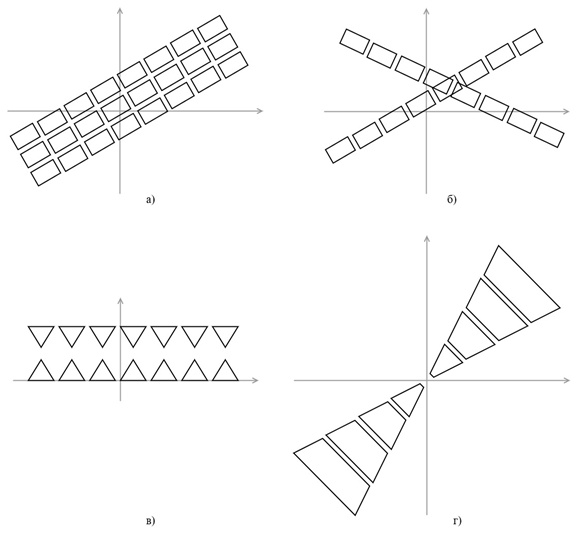

Рисунок 3 — Реализация операции параллельного переноса (а), поворота (б),
симметрии (в) и гомотетии (г)

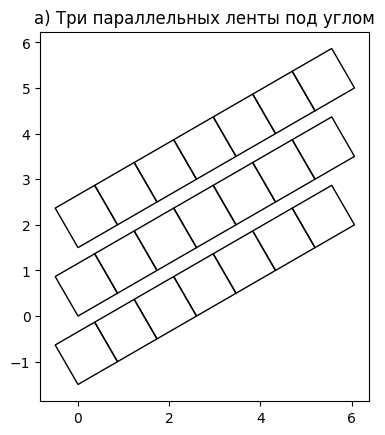

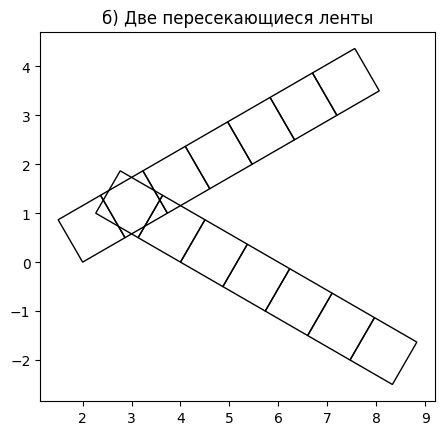

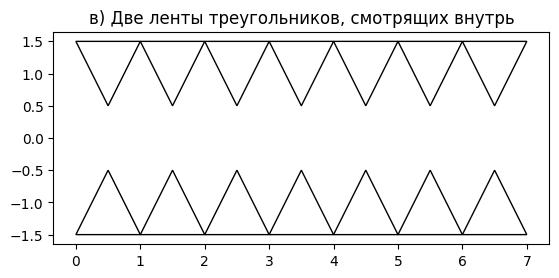

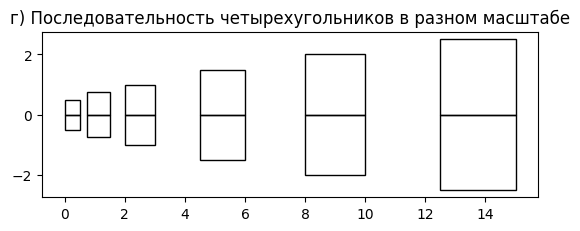

In [63]:
# a)
base = list(islice(gen_rectangle(), 7))
belt1 = map(lambda p: tr_rotate(p, 30), base)
belt2 = map(lambda p: tr_translate(tr_rotate(p, 30), 0, 1.5), base)
belt3 = map(lambda p: tr_translate(tr_rotate(p, 30), 0, -1.5), base)

visualize(chain(belt1, belt2, belt3), title="а) Три параллельных ленты под углом")

# б)
base = list(islice(gen_rectangle(start_x=2), 7))
belt1 = map(lambda p: tr_rotate(p, 30, center=(2, 0)), base)
belt2 = map(lambda p: tr_rotate(p, -30, center=(4, 0)), base)

visualize(chain(belt1, belt2), title="б) Две пересекающиеся ленты")

# в)
base = list(islice(gen_triangle(), 7))
belt1 = map(lambda p: tr_translate(tr_symmetry(p, axis='x'), 0, 1.5), base)
belt2 = map(lambda p: tr_translate(p, 0, -1.5), base)

visualize(chain(belt1, belt2), title="в) Две ленты треугольников, смотрящих внутрь")

# г)
base = list(islice(gen_rectangle(), 6))
scales = [0.5, 0.75, 1.0, 1.5, 2.0, 2.5]
homothetic = map(lambda pair: tr_homothety(pair[0], scale=pair[1]), zip(base, scales))
homothetic_mirror = map(lambda p: tr_symmetry(p, axis='x'), homothetic)
homothetic = map(lambda pair: tr_homothety(pair[0], scale=pair[1]), zip(base, scales))


visualize(chain(homothetic, homothetic_mirror), title="г) Последовательность четырехугольников в разном масштабе")

5.	Реализовать операции:

* фильтрации фигур, являющихся выпуклыми многоугольниками (`flt_convex_polygon`);

* фильтрации фигур, имеющих хотя бы один угол, совпадающий с заданной точкой (`flt_angle_point`);

* фильтрации фигур, имеющих площадь меньше заданной (`flt_square`);

* фильтрации фигур, имеющих кратчайшую сторону меньше заданного значения (`flt_short_side`);

* фильтрации выпуклых многоугольников, включающих заданную точку (внутри многоугольника) (`flt_point_inside`);

* фильтрации выпуклых многоугольников, включающих любой из углов заданного многоугольника (`flt_polygon_angles_inside`);

которые можно применить к последовательности полигонов с помощью функции `filter`.

<font color="Crimson">**обязательная часть: 2 пункта<br>4 пункта — сложность 1<br>6 пунктов — сложность 2**


In [64]:
# Проверка выпуклости (на основе векторного произведения)
def flt_convex_polygon(polygon):
    """Проверяет, является ли полигон выпуклым, используя векторное произведение.

    Args:
        polygon (iterable): Итерируемый объект, содержащий координаты вершин полигона.
                           Каждая вершина представлена кортежем (x, y).

    Returns:
        bool: True, если полигон выпуклый, False в противном случае.
              Треугольники (полигоны с менее чем 4 вершинами) считаются выпуклыми.
    """
    def cross(o, a, b):
        return (a[0] - o[0])*(b[1] - o[1]) - (a[1] - o[1])*(b[0] - o[0])

    n = len(polygon)
    if n < 4:
        return True  # треугольник всегда выпуклый

    sign = None
    for i in range(n):
        c = cross(polygon[i], polygon[(i+1)%n], polygon[(i+2)%n])
        if c != 0:
            if sign is None:
                sign = c > 0
            elif (c > 0) != sign:
                return False
    return True

# Фигура содержит точку как вершину
def flt_angle_point(polygon, point):
    """Проверяет, является ли заданная точка вершиной полигона.

    Args:
        polygon (iterable): Итерируемый объект, содержащий координаты вершин полигона.
                           Каждая вершина представлена кортежем (x, y).
        point (tuple): Координаты точки в формате (x, y).

    Returns:
        bool: True, если точка является одной из вершин полигона, False в противном случае.
    """
    return point in polygon

# Площадь меньше заданной (по формуле Шнелля)
def flt_square(polygon, max_area):
    """Проверяет, меньше ли площадь полигона заданного значения.

    Args:
        polygon (iterable): Итерируемый объект, содержащий координаты вершин полигона.
                           Каждая вершина представлена кортежем (x, y).
        max_area (float): Максимально допустимая площадь полигона.

    Returns:
        bool: True, если площадь полигона меньше max_area, False в противном случае.
    """
    def area(poly):
        return 0.5 * abs(sum(
            poly[i][0]*poly[(i+1)%len(poly)][1] - poly[(i+1)%len(poly)][0]*poly[i][1]
            for i in range(len(poly))
        ))
    return area(polygon) < max_area

# Кратчайшая сторона меньше заданной длины
def flt_short_side(polygon, min_length):
    """Проверяет, есть ли у полигона сторона короче заданной длины.

    Args:
        polygon (iterable): Итерируемый объект, содержащий координаты вершин полигона.
                           Каждая вершина представлена кортежем (x, y).
        min_length (float): Минимально допустимая длина стороны.

    Returns:
        bool: True, если длина кратчайшей стороны полигона меньше min_length, False в противном случае.
    """
    def dist(p1, p2):
        return ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**0.5
    lengths = [dist(polygon[i], polygon[(i+1)%len(polygon)]) for i in range(len(polygon))]
    return min(lengths) < min_length



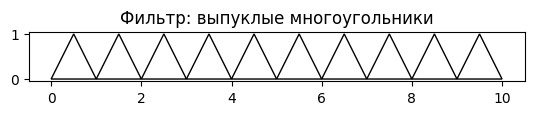

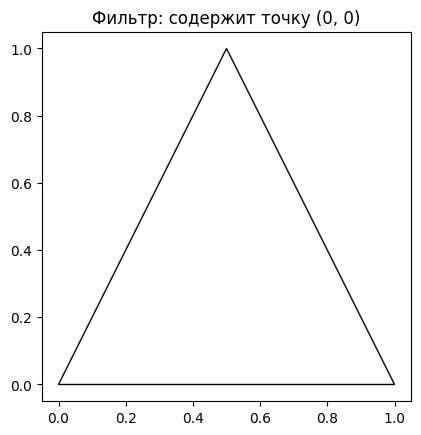

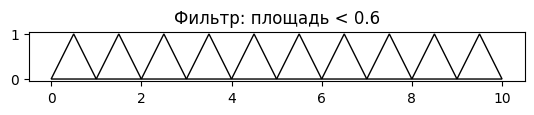

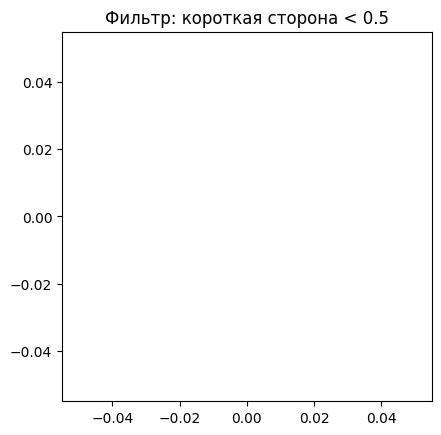

In [65]:
# Исходные данные — 10 треугольников
polygons = list(islice(gen_triangle(), 10))

# Отфильтрованные последовательности
convex = list(filter(flt_convex_polygon, polygons))
with_point = list(filter(lambda p: flt_angle_point(p, (0, 0)), polygons))
small_area = list(filter(lambda p: flt_square(p, 0.6), polygons))
short_sides = list(filter(lambda p: flt_short_side(p, 0.5), polygons))


# Визуализация всех
visualize(convex, title="Фильтр: выпуклые многоугольники")
visualize(with_point, title="Фильтр: содержит точку (0, 0)")
visualize(small_area, title="Фильтр: площадь < 0.6")
visualize(short_sides, title="Фильтр: короткая сторона < 0.5")

6.	С помощью данных функций реализовать и визуализировать:

* фильтрацию фигур, созданных в рамках пункта 4.4; подобрать параметры так, чтобы на выходе было получено шесть фигур;

* используя функции генерации из п. 2 и операции из п. 3, создать не менее 15 фигур, которые имеют различный масштаб, и выбрать из них (подбором параметра фильтрации) не более четырех фигур, имеющих кратчайшую сторону меньше заданного значения;

* используя функции генерации из п. 2 и операции из п. 3, создать не менее 15 фигур имеющих множество пересечений и обеспечить фильтрацию пересекающихся фигур.

<font color="Crimson">**обязательная часть: 1 пункт<br>3 пункта — сложность 1**

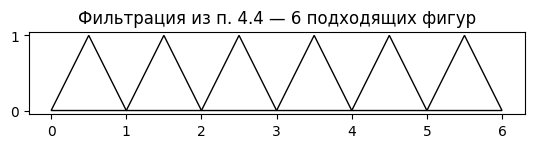

In [66]:
# Взять ленту из треугольников и симметричных
base = list(islice(gen_triangle(), 10))
symmetric = list(map(lambda p: tr_translate(tr_symmetry(p, 'x'), 0, -2), base))
all_tris = list(chain(base, symmetric))

# Фильтрация: площадь < 0.6 и короткая сторона < 1.2
filtered = list(filter(lambda p: flt_square(p, 0.6) and flt_short_side(p, 1.2), all_tris))

# Ограничим до 6, если больше
filtered = filtered[:6]

# Визуализация
visualize(filtered, title="Фильтрация из п. 4.4 — 6 подходящих фигур")

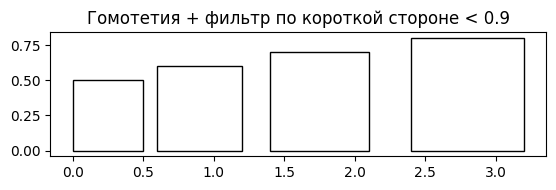

In [67]:
# Исходные прямоугольники
base = list(islice(gen_rectangle(), 15))
scales = [0.5 + 0.1 * i for i in range(15)]  # масштаб от 0.5 до 1.9

# Применяем гомотетию
scaled = list(map(lambda pair: tr_homothety(pair[0], scale=pair[1]), zip(base, scales)))

# Фильтрация по короткой стороне < 0.9
filtered_scaled = list(filter(lambda p: flt_short_side(p, 0.9), scaled))

# Ограничим до 4
filtered_scaled = filtered_scaled[:4]

# Визуализация
visualize(filtered_scaled, title="Гомотетия + фильтр по короткой стороне < 0.9")

7.	Реализовать декораторы и продемонстрировать корректность их работы:

* фильтрующие многоугольники в итераторах среди аргументов функции, работающие на основе функций из п. 5: `@flt_convex_polygon`, `@flt_angle_point`, `@flt_square`, `@flt_short_side`, `@flt_point_inside`, `@flt_polygon_angles_inside`;

* преобразующие многоугольники в итераторах среди аргументов функции, работающие на основе функций из п. 3: `@tr_translate`, `@tr_rotate`, `@tr_symmetry`, `@tr_homothety`.

<font color="Crimson">**обязательная часть: 1 пункт<br>5 пунктов — сложность 1**

In [68]:
def is_convex(polygon):
    """Проверяет, является ли полигон выпуклым, используя векторное произведение.

    Args:
        polygon (iterable): Итерируемый объект, содержащий координаты вершин полигона.
                           Каждая вершина представлена кортежем (x, y).

    Returns:
        bool: True, если полигон выпуклый, False в противном случае.
              Треугольники (полигоны с менее чем 4 вершинами) считаются выпуклыми.
    """
    def cross(o, a, b):
        return (a[0] - o[0])*(b[1] - o[1]) - (a[1] - o[1])*(b[0] - o[0])
    n = len(polygon)
    if n < 4: return True
    sign = None
    for i in range(n):
        c = cross(polygon[i], polygon[(i+1)%n], polygon[(i+2)%n])
        if c != 0:
            if sign is None:
                sign = c > 0
            elif (c > 0) != sign:
                return False
    return True

def is_angle_point(polygon, point):
    """Проверяет, является ли заданная точка вершиной полигона.

    Args:
        polygon (iterable): Итерируемый объект, содержащий координаты вершин полигона.
                           Каждая вершина представлена кортежем (x, y).
        point (tuple): Координаты точки в формате (x, y).

    Returns:
        bool: True, если точка является одной из вершин полигона, False в противном случае.
    """
    return point in polygon

def is_area_less(polygon, max_area):
    """Проверяет, меньше ли площадь полигона заданного значения, используя формулу Шнелля.

    Args:
        polygon (iterable): Итерируемый объект, содержащий координаты вершин полигона.
                           Каждая вершина представлена кортежем (x, y).
        max_area (float): Максимально допустимая площадь полигона.

    Returns:
        bool: True, если площадь полигона меньше max_area, False в противном случае.
    """
    return 0.5 * abs(sum(
        polygon[i][0]*polygon[(i+1)%len(polygon)][1] - polygon[(i+1)%len(polygon)][0]*polygon[i][1]
        for i in range(len(polygon))
    )) < max_area

def is_short_side(polygon, threshold):
    """Проверяет, есть ли у полигона сторона короче заданной длины.

    Args:
        polygon (iterable): Итерируемый объект, содержащий координаты вершин полигона.
                           Каждая вершина представлена кортежем (x, y).
        threshold (float): Минимально допустимая длина стороны.

    Returns:
        bool: True, если длина кратчайшей стороны полигона меньше threshold, False в противном случае.
    """
    def dist(p1, p2):
        return ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**0.5
    lengths = [dist(polygon[i], polygon[(i+1)%len(polygon)]) for i in range(len(polygon))]
    return min(lengths) < threshold

def is_point_inside(polygon, point):
    """Проверяет, находится ли точка внутри полигона, используя метод луча.

    Args:
        polygon (iterable): Итерируемый объект, содержащий координаты вершин полигона.
                           Каждая вершина представлена кортежем (x, y).
        point (tuple): Координаты точки в формате (x, y).

    Returns:
        bool: True, если точка находится внутри полигона, False в противном случае.

    Note:
        Точка на границе полигона не считается внутренней.
        Для предотвращения деления на ноль добавляется малая константа (1e-10).
    """
    x, y = point
    inside = False
    n = len(polygon)
    for i in range(n):
        x0, y0 = polygon[i]
        x1, y1 = polygon[(i + 1) % n]
        if (y0 > y) != (y1 > y):
            xinters = (x1 - x0) * (y - y0) / (y1 - y0 + 1e-10) + x0
            if x < xinters:
                inside = not inside
    return inside

def is_polygon_angles_inside(polygon, test_polygon):
    """Проверяет, находится ли хотя бы одна вершина test_polygon внутри polygon.

    Args:
        polygon (iterable): Итерируемый объект, содержащий координаты вершин основного полигона.
                           Каждая вершина представлена кортежем (x, y).
        test_polygon (iterable): Итерируемый объект, содержащий координаты вершин проверяемого полигона.
                                 Каждая вершина представлена кортежем (x, y).

    Returns:
        bool: True, если хотя бы одна вершина test_polygon находится внутри polygon,
              False в противном случае.
    """
    return any(is_point_inside(polygon, pt) for pt in test_polygon)

def flt_convex_polygon(func):
    """Декоратор, фильтрующий только выпуклые полигоны перед вызовом функции.

    Args:
        func (callable): Функция, которую нужно декорировать.

    Returns:
        callable: Обёрнутая функция, которая применяет фильтр is_convex к полигонам.
    """
    def wrapper(polygons, *args, **kwargs):
        return func(filter(is_convex, polygons), *args, **kwargs)
    return wrapper

def flt_angle_point(point):
    """Декоратор, фильтрующий полигоны, содержащие заданную точку как вершину.

    Args:
        point (tuple): Координаты точки в формате (x, y).

    Returns:
        callable: Декоратор, который фильтрует полигоны, используя is_angle_point.
    """
    def decorator(func):
        def wrapper(polygons, *args, **kwargs):
            return func(filter(lambda p: is_angle_point(p, point), polygons), *args, **kwargs)
        return wrapper
    return decorator

def flt_square(max_area):
    """Декоратор, фильтрующий полигоны с площадью меньше заданного значения.

    Args:
        max_area (float): Максимально допустимая площадь полигона.

    Returns:
        callable: Декоратор, который фильтрует полигоны, используя is_area_less.
    """
    def decorator(func):
        def wrapper(polygons, *args, **kwargs):
            return func(filter(lambda p: is_area_less(p, max_area), polygons), *args, **kwargs)
        return wrapper
    return decorator

def flt_short_side(threshold):
    """Декоратор, фильтрующий полигоны с хотя бы одной стороной короче заданной длины.

    Args:
        threshold (float): Минимально допустимая длина стороны.

    Returns:
        callable: Декоратор, который фильтрует полигоны, используя is_short_side.
    """
    def decorator(func):
        def wrapper(polygons, *args, **kwargs):
            return func(filter(lambda p: is_short_side(p, threshold), polygons), *args, **kwargs)
        return wrapper
    return decorator

def flt_point_inside(point):
    """Декоратор, фильтрующий полигоны, содержащие заданную точку внутри.

    Args:
        point (tuple): Координаты точки в формате (x, y).

    Returns:
        callable: Декоратор, который фильтрует полигоны, используя is_point_inside.
    """
    def decorator(func):
        def wrapper(polygons, *args, **kwargs):
            return func(filter(lambda p: is_point_inside(p, point), polygons), *args, **kwargs)
        return wrapper
    return decorator

def flt_polygon_angles_inside(test_polygon):
    """Декоратор, фильтрующий полигоны, содержащие хотя бы одну вершину test_polygon внутри.

    Args:
        test_polygon (iterable): Итерируемый объект, содержащий координаты вершин проверяемого полигона.
                                 Каждая вершина представлена кортежем (x, y).

    Returns:
        callable: Декоратор, который фильтрует полигоны, используя is_polygon_angles_inside.
    """
    def decorator(func):
        def wrapper(polygons, *args, **kwargs):
            return func(filter(lambda p: is_polygon_angles_inside(p, test_polygon), polygons), *args, **kwargs)
        return wrapper
    return decorator

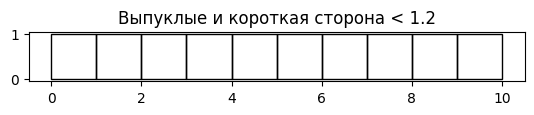

In [69]:
@flt_convex_polygon
@flt_short_side(1.2)
def show_filtered(polygons):
    visualize(polygons, title="Выпуклые и короткая сторона < 1.2")

show_filtered(list(islice(gen_rectangle(), 10)))

8. Реализовать функции и продемонстрировать их корректность:

* поиск угла, самого близкого к началу координат (`agr_origin_nearest`);

* поиск самого длинной стороны многоугольника (`agr_max_side`);

* поиск самой маленькой площади многоугольника (`agr_min_area`);

* расчет суммарного периметра (`agr_perimeter`);

* расчет суммарной площади (`agr_area`);

которые можно применить к последовательности полигонов с помощью функции `functools.reduce`.

<font color="Crimson">**3 пункта — сложность 1<br>5 пунктов — сложность 2**


In [72]:
# Найти точку (угол), ближайшую к (0,0)
def agr_origin_nearest(polygons):
    """Находит вершину среди всех полигонов, ближайшую к началу координат (0,0).

    Args:
        polygons (iterable): Итерируемый объект, содержащий полигоны.
                           Каждый полигон представлен списком или кортежем вершин,
                           где каждая вершина — кортеж (x, y).

    Returns:
        tuple: Координаты ближайшей вершины в формате (x, y).
               Если полигоны пусты, возвращает (inf, inf).
    """
    def distance(p):
        return p[0]**2 + p[1]**2  # квадрат расстояния
    return reduce(
        lambda nearest, poly: min(nearest, min(poly, key=distance), key=distance),
        polygons,
        (float('inf'), float('inf'))
    )

# Найти длину самой длинной стороны среди всех многоугольников
def agr_max_side(polygons):
    """Находит длину самой длинной стороны среди всех полигонов.

    Args:
        polygons (iterable): Итерируемый объект, содержащий полигоны.
                           Каждый полигон представлен списком или кортежем вершин,
                           где каждая вершина — кортеж (x, y).

    Returns:
        float: Длина самой длинной стороны. Если полигоны пусты, возвращает 0.
    """
    def side_lengths(polygon):
        return [((polygon[i][0]-polygon[(i+1)%len(polygon)][0])**2 +
                 (polygon[i][1]-polygon[(i+1)%len(polygon)][1])**2)**0.5
                for i in range(len(polygon))]
    return reduce(
        lambda acc, poly: max(acc, max(side_lengths(poly))),
        polygons,
        0
    )

# Найти минимальную площадь среди всех многоугольников
def agr_min_area(polygons):
    """Находит минимальную площадь среди всех полигонов, используя формулу Шнелля.

    Args:
        polygons (iterable): Итерируемый объект, содержащий полигоны.
                           Каждый полигон представлен списком или кортежем вершин,
                           где каждая вершина — кортеж (x, y).

    Returns:
        float: Минимальная площадь полигона. Если полигоны пусты, возвращает inf.
    """
    def area(poly):
        return 0.5 * abs(sum(
            poly[i][0]*poly[(i+1)%len(poly)][1] - poly[(i+1)%len(poly)][0]*poly[i][1]
            for i in range(len(poly))
        ))
    return reduce(
        lambda acc, poly: min(acc, area(poly)),
        polygons,
        float('inf')
    )

# Суммарный периметр
def agr_perimeter(polygons):
    """Вычисляет суммарный периметр всех полигонов.

    Args:
        polygons (iterable): Итерируемый объект, содержащий полигоны.
                           Каждый полигон представлен списком или кортежем вершин,
                           где каждая вершина — кортеж (x, y).

    Returns:
        float: Сумма периметров всех полигонов. Если полигоны пусты, возвращает 0.
    """
    def perimeter(poly):
        return sum(
            ((poly[i][0]-poly[(i+1)%len(poly)][0])**2 + (poly[i][1]-poly[(i+1)%len(poly)][1])**2)**0.5
            for i in range(len(poly))
        )
    return reduce(
        lambda acc, poly: acc + perimeter(poly),
        polygons,
        0
    )

# Суммарная площадь
def agr_area(polygons):
    """Вычисляет суммарную площадь всех полигонов, используя формулу Шнелля.

    Args:
        polygons (iterable): Итерируемый объект, содержащий полигоны.
                           Каждый полигон представлен списком или кортежем вершин,
                           где каждая вершина — кортеж (x, y).

    Returns:
        float: Сумма площадей всех полигонов. Если полигоны пусты, возвращает 0.
    """
    def area(poly):
        return 0.5 * abs(sum(
            poly[i][0]*poly[(i+1)%len(poly)][1] - poly[(i+1)%len(poly)][0]*poly[i][1]
            for i in range(len(poly))
        ))
    return reduce(
        lambda acc, poly: acc + area(poly),
        polygons,
        0
    )

In [73]:
polys = list(islice(gen_triangle(), 10))

print("Угол ближайший к (0,0):", agr_origin_nearest(polys))
print("Максимальная сторона:", agr_max_side(polys))
print("Минимальная площадь:", agr_min_area(polys))
print("Суммарный периметр:", agr_perimeter(polys))
print("Суммарная площадь:", agr_area(polys))

Угол ближайший к (0,0): (0, 0)
Максимальная сторона: 1.118033988749895
Минимальная площадь: 0.5
Суммарный периметр: 32.3606797749979
Суммарная площадь: 5.0


9. Реализовать функции и продемонстрировать пример их работы (если возможно, с визуализацией):

* склейки полигонов в одну последовательность полигонов из нескольких последовательностей полигонов `zip_polygons(iterator1, iterator2, [iterator3, ...])`. Пример:  

    ```zip_polygons([((1, 1), (2, 2), (3, 1)), ((11, 11), (12, 12), (13, 11))], [((1, -1), (2, -2), (3, -1)), ((11, -11), (12, -12), (13, -11))])``` →

    ```[((1, 1), (2, 2), (3, 1), (1, -1), (2, -2), (3, -1)), ((11, 11), (12, 12), (13, 11), (11, -11), (12, -12), (13, -11))]```.

Альтернативный пример (визуализация) на рис. 4.

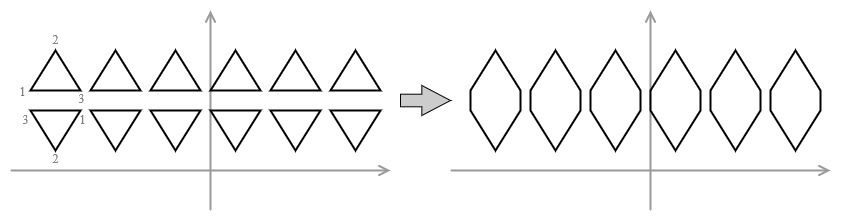

Рисунок 4 — Альтернативный пример склейки полигонов

* генерации `count_2D()` параметры: `(start1, start2)`, `[(step1, step2)]`, результаты: `(start1, start2)`, `(start1+step1, start2+step2)`, `(start1+2*step1, start2+2*step2)`;

* склейки полигонов в одну последовательность полигонов из нескольких последовательностей `zip_tuple(iterator1, iterator2)`. Пример:

    ```zip_tuple([(1,1),  (2,2), (3,3), (4,4)], [(2,2), (3,3), (4,4), (5,5)], [(3,3), (4,4), (5,5), (6,6)])``` →

    ```((1,1),  (2,2), (3,3)), ((2,2), (3,3) (4,4)), ((3,3), (4,4), (5,5)), ((5,5), (6,6), (7,7))```.

<font color="Crimson">**3 пункта — сложность 1**